# ResNet : Residual Net.

* Es de Microsoft. Los autores son He et. al.
* Esta gano el ImageNnet ILSVRC del 2015. 

Cual es la idea de "residual".

Asuma un stack the capas, el residual de la salida del stack
$\mathcal{H}$ y la entrada $x$ es $\mathcal{F} = \mathcal{H} -x $.
Entonces la salida $\mathcal{H}$ se puede escribir como $\mathcal{H}=x + \mathcal{F}$. 

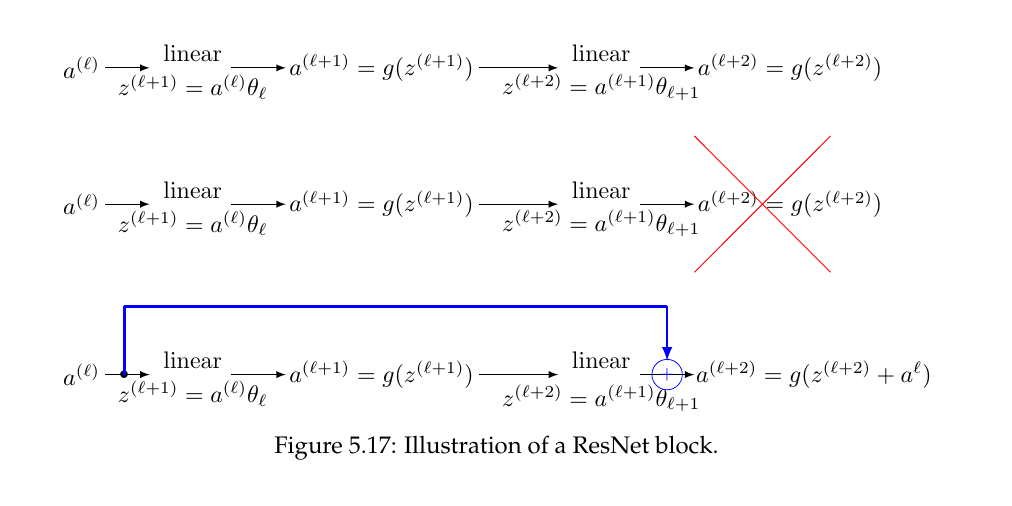

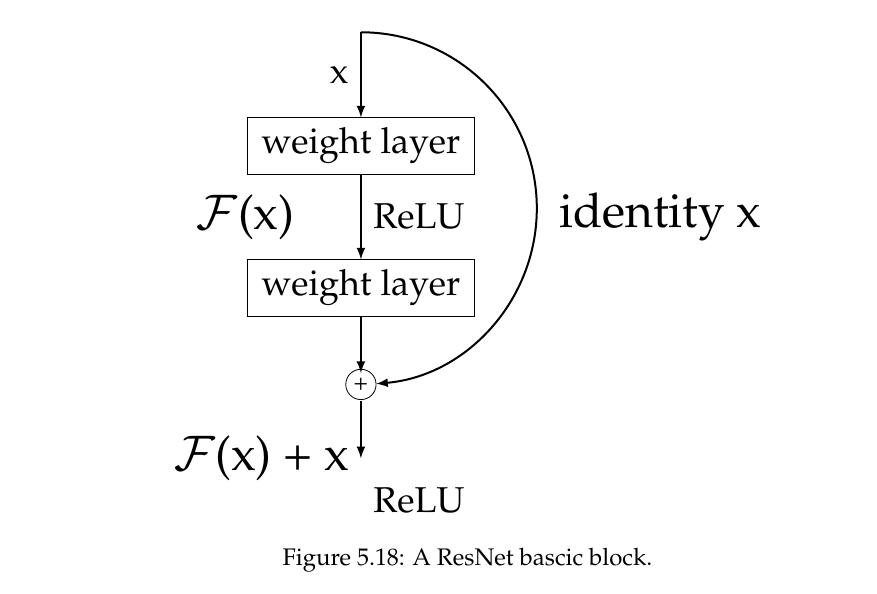

In [ ]:
# implementacion sencilla en Keras del ResNet
def residual_module(x, n_filters):
# convolucion y capas 1 y 2
    conv1 = Conv2D(n_filters, (3,3), padding='same', activacion='relu',
    kernel_initializer='he_normal')(x)
    conv2 = Conv2D(n_filters, (3,3), padding='same', activation='relul',
    kernel_initializer='he_normal')(conv1)

    # le sumamos la entrada x
    layer_out = add( [conv2, x])
    layer_out = Activation('relu')(layer_out)
    return layer_out
    

In [ ]:
# podria pasar que el numero de filtros en la capa de entrada x, no coincida con el numero 
# de filtros requeridos en la funcion

def residual_module(x, n_filters):
    merge_output=x
    # chequeamos que el numero de filtros de la salida de x coincide con n_filters
    if x.shape[-1] != n_filters;
        merge_input = Conv2D(n_filters, (1,1), padding='same', 
        activation='relu', kernel_initializer='he_normal')(x)

    # convolucion de capas 1 y 2
    conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu',
                   kernel_initializer='he_normal'))



# Redes neuronales recurrentes (RNN):
El siguiente ejemplo es una modificacion de un video en YouTube (de Luis Serrano)
[Luis Serrano](https://www.youtube.com/watch?v=UNmqTiOnRfg)

La idea del ejemplo de Serrano es la siguiente:
Suponga que usted trabaja como mensajero y se desplazar por 3 ciudades A, B, C  (medellin, cali, bucaramanga, por ejemplo).

Queremos un red neuronal que nos diga cual es la proxima ciudad que usted esta visitando. $A \to B$, $B \to C$, y $C \to A$.

Construyamos un algoritmo para esto. Las ciudades $A,B,C$ las codificamos como one-hot encoded:


$$A \mapsto \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix} \quad , \quad B \mapsto \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix} \quad , \quad C  \mapsto \begin{pmatrix} 0  \\ 0 \\ 1 \end{pmatrix} $$


El operador  que me hace este trabajo es:


$$ M = \begin{pmatrix}  0 & 0 & 1 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{pmatrix}$$

Por pura multiplicacion de matrices:

\begin{eqnarray}
MA = \begin{pmatrix}  0 & 0 & 1 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{pmatrix}
 \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix} =  \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix} = B \\
 MB = \begin{pmatrix}  0 & 0 & 1 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{pmatrix}
 \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0  \\ 0 \\ 1 \end{pmatrix} = C \\
 MC = \begin{pmatrix}  0 & 0 & 1 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} 0  \\ 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}   = A
\end{eqnarray}

Llevamos este problema al contexto de redes neuronales.





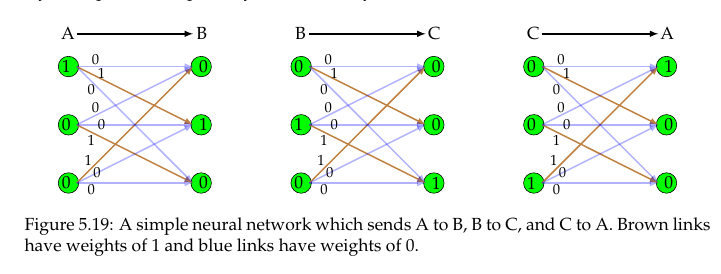

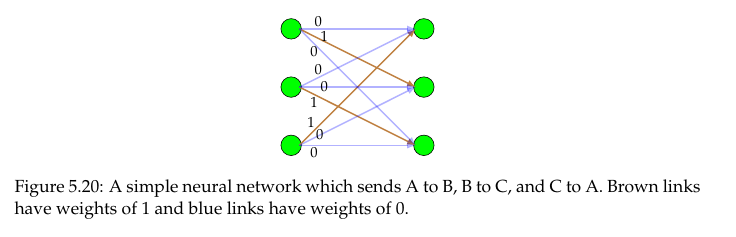

Si el mensajero tiviese que recorrer las ciudades $ABCABCABCAB$

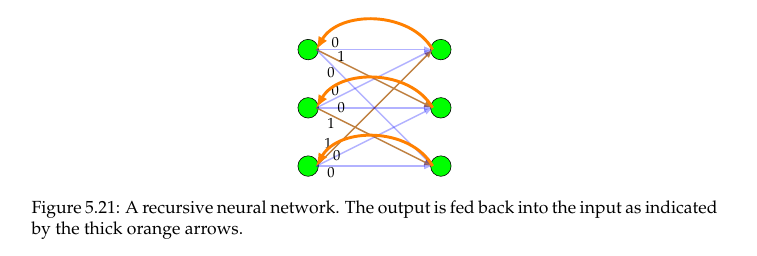



Complicamos el problema un poco mas. Por razones logisticas (de tiempo, transporte, etc) el mensajero se debe quedar en la ciudad donde permanece.
$ABBCABCCA$


\begin{eqnarray}
\text{stay} \mapsto \begin{pmatrix} 1 \\ 0 \end{pmatrix} \\
\text{leave} \mapsto \begin{pmatrix} 0 \\ 1 \end{pmatrix} 
\end{eqnarray}

Extendamos la matriz $$.

\begin{eqnarray}
M = \begin{pmatrix}
1 & 0 & 0  \\
0 & 1 & 0 \\
0 & 0 & 1 \\
- & - & - \\
0 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0
\end{pmatrix}
\end{eqnarray}

Con la matriz $M$ podemos ahora tener dos opciones:

$$ MC = \begin{pmatrix}
1 & 0 & 0  \\
0 & 1 & 0 \\
0 & 0 & 1 \\
- & - & - \\
0 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0
\end{pmatrix} \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}  =
\begin{pmatrix}  0 \\ 0 \\1 \\ - \\ 1 \\ 0 \\ 0 \end{pmatrix}  ⇒ 
\begin{pmatrix} \text{stay} \\ \text{leave}  \end{pmatrix}$$

Genermos una "stay-leave" matrix.

$$ \text{stay-leave} = \begin{pmatrix}  1 & 0 \\ 1 & 0 \\ 1 & 0 \\ - & - \\ 0 & 1 \\ 0 & 1 \\ 0 & 1\end{pmatrix} $$

Veamos por que esta matriz puede recibir el calificativo de stay-leave.

$$ \text{(stay-leave) ( stay)} =  \begin{pmatrix}  1 & 0 \\ 1 & 0 \\ 1 & 0 \\ - & - \\ 0 & 1 \\ 0 & 1 \\ 0 & 1\end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix}  = \begin{pmatrix} 1 \\ 1 \\ 1 \\ - \\ 0 \\ 0 \\ 0\end{pmatrix} $$

$$ \text{(stay-leave) ( leave)} =  \begin{pmatrix}  1 & 0 \\ 1 & 0 \\ 1 & 0 \\ - & - \\ 0 & 1 \\ 0 & 1 \\ 0 & 1\end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix}  = \begin{pmatrix} 0 \\ 0 \\ 0 \\ - \\ 1 \\ 1 \\ 1 \end{pmatrix} $$

Obtuvimos los siguientes resultados:


$$ M C = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 1 \\ 0 \\ 0  \end{pmatrix} $$
$$ \text{(stay-leave)(stay)} =\begin{pmatrix} 1 \\ 1 \\ 1 \\ - \\ 0 \\ 0 \\ 0 \end{pmatrix} $$

Sumamos los dos resultados.




$$ MC + \text{(stay-leave)(stay)} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ - \\ 1 \\ 0 \\ 0 \end{pmatrix}  + \begin{pmatrix} 1 \\ 1 \\ 1 \\ - \\ 0 \\ 0 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 1 \\ 2 \\ 1 \\ 0 \\ 0 \end{pmatrix} $$

Aca hacemos la activacion (no es lineal)  a la maxima de todas components el asignamos 1 y a las demas cero el resultado es:

$$ \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0  \end{pmatrix} $$

Necesitamos una ultima operacion para llegar a $(0,0,1)^T$ que es "quedarse en $C$ (Bucaramanga, por ejemplo) esta operacion es la multiplicacion.

\begin{eqnarray}
\begin{pmatrix}  1 & 0 & 0 & 1 & 0 & 0  \\
0 & 1 & 0 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 & 1 \end{pmatrix}
\begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 
\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix} = C
\end{eqnarray}

Que este ultimo operador

\begin{eqnarray}
\begin{pmatrix}  1 & 0 & 0 & 1 & 0 & 0  \\
0 & 1 & 0 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 & 1 \end{pmatrix}
\begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ y_1 \\ y_2 \\ y_3 
\end{pmatrix} = \begin{pmatrix} x_1 + y_1  \\ x_2 + y_2 \\ x_3 + y_3 \end{pmatrix} = C
\end{eqnarray}



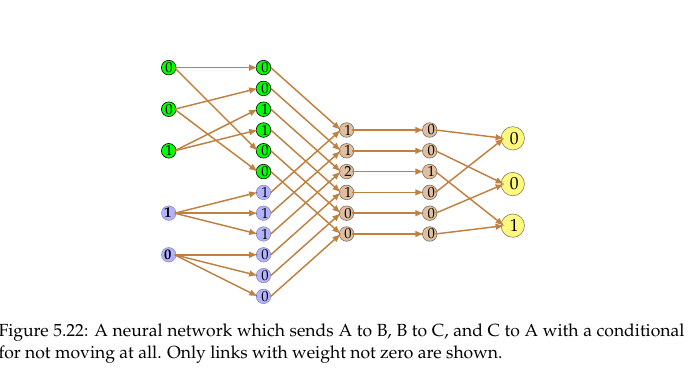

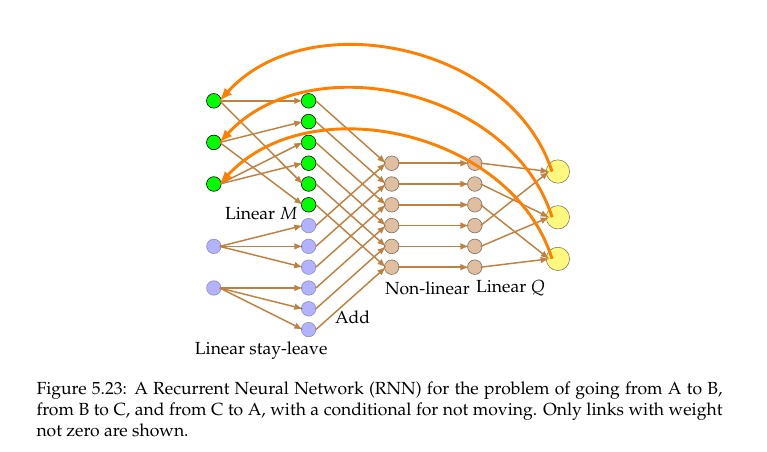

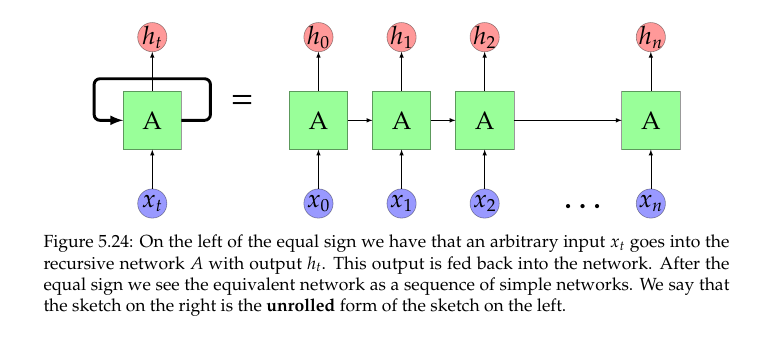

$$ h_t = f_{\Theta} ( h_{t-1}, x_t) $$

Si quisieramos escribir en pseudocodigo


In [ ]:
h=0
for i in range(n):
    x_i = input_data_i
    h=f( np.dot( Theta_x, x_i) + np.dot(Theta_h, h_i) )

Otros modelos:

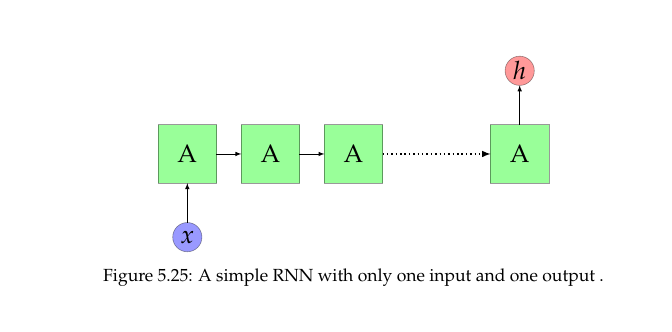

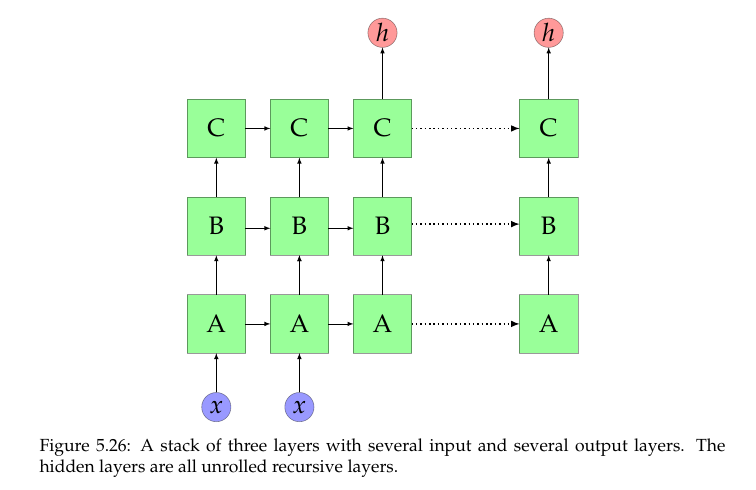

Una lista de posibles arquitecturas:

* Muchas entradas a muchas salida. La primera figura. 
* Una entrada, una salida
* varias entradas, varias salidas varias capas . La tercera.